In [1]:
import Tasmanian
import TasmanianSG

In [2]:
TasmanianSG.lsTsgGlobalTypes

['level',
 'curved',
 'iptotal',
 'ipcurved',
 'qptotal',
 'qpcurved',
 'hyperbolic',
 'iphyperbolic',
 'qphyperbolic',
 'tensor',
 'iptensor',
 'qptensor']

In [3]:
Tasmanian.lsTsgGlobalRules

['clenshaw-curtis',
 'clenshaw-curtis-zero',
 'chebyshev',
 'chebyshev-odd',
 'gauss-legendre',
 'gauss-legendre-odd',
 'gauss-patterson',
 'leja',
 'leja-odd',
 'rleja',
 'rleja-odd',
 'rleja-double2',
 'rleja-double4',
 'rleja-shifted',
 'rleja-shifted-even',
 'rleja-shifted-double',
 'max-lebesgue',
 'max-lebesgue-odd',
 'min-lebesgue',
 'min-lebesgue-odd',
 'min-delta',
 'min-delta-odd',
 'gauss-chebyshev1',
 'gauss-chebyshev1-odd',
 'gauss-chebyshev2',
 'gauss-chebyshev2-odd',
 'fejer2',
 'gauss-gegenbauer',
 'gauss-gegenbauer-odd',
 'gauss-jacobi',
 'gauss-jacobi-odd',
 'gauss-laguerre',
 'gauss-laguerre-odd',
 'gauss-hermite',
 'gauss-hermite-odd',
 'custom-tabulated']

In [4]:
grid = Tasmanian.TasmanianSparseGrid()
grid.makeGlobalGrid(iDimension=2, iOutputs=1, iDepth=5, sType='level', sRule='clenshaw-curtis')

In [5]:
type(grid.getPoints())

numpy.ndarray

In [6]:
grid.getNeededPoints()

array([[ 0.        ,  0.        ],
       [ 0.        , -1.        ],
       [ 0.        ,  1.        ],
       [ 0.        , -0.70710678],
       [ 0.        ,  0.70710678],
       [ 0.        , -0.92387953],
       [ 0.        , -0.38268343],
       [ 0.        ,  0.38268343],
       [ 0.        ,  0.92387953],
       [ 0.        , -0.98078528],
       [ 0.        , -0.83146961],
       [ 0.        , -0.55557023],
       [ 0.        , -0.19509032],
       [ 0.        ,  0.19509032],
       [ 0.        ,  0.55557023],
       [ 0.        ,  0.83146961],
       [ 0.        ,  0.98078528],
       [ 0.        , -0.99518473],
       [ 0.        , -0.95694034],
       [ 0.        , -0.88192126],
       [ 0.        , -0.77301045],
       [ 0.        , -0.63439328],
       [ 0.        , -0.47139674],
       [ 0.        , -0.29028468],
       [ 0.        , -0.09801714],
       [ 0.        ,  0.09801714],
       [ 0.        ,  0.29028468],
       [ 0.        ,  0.47139674],
       [ 0.        ,

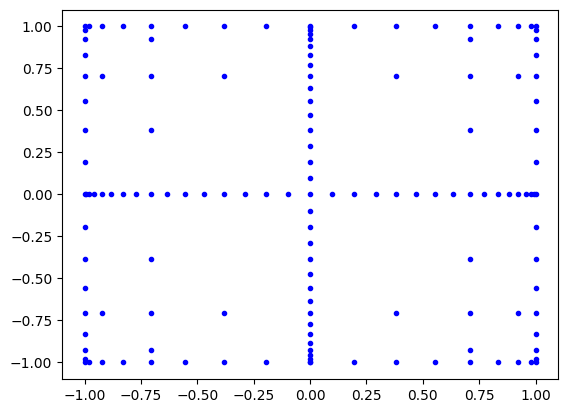

In [7]:
grid.plotPoints2D()

In [8]:
grid.isSequence()

False

In [12]:
pts = grid.getNeededPoints()

In [14]:
pts.shape

(145, 2)

In [15]:
import numpy as np
vals = np.exp(-np.sum(pts**2, axis=1))
grid.loadNeededValues(vals.reshape(-1, 1))

In [20]:
vals

array([1.        , 0.36787944, 0.36787944, 0.60653066, 0.60653066,
       0.42589885, 0.86377185, 0.86377185, 0.42589885, 0.38215088,
       0.50090355, 0.73443169, 0.96265495, 0.96265495, 0.73443169,
       0.50090355, 0.38215088, 0.37143082, 0.40022243, 0.45942245,
       0.55016054, 0.66867654, 0.80074328, 0.91918746, 0.99043864,
       0.99043864, 0.91918746, 0.80074328, 0.66867654, 0.55016054,
       0.45942245, 0.40022243, 0.37143082, 0.36787944, 0.13533528,
       0.13533528, 0.22313016, 0.22313016, 0.15667943, 0.3177639 ,
       0.3177639 , 0.15667943, 0.14058545, 0.18427212, 0.27018232,
       0.35414097, 0.35414097, 0.27018232, 0.18427212, 0.14058545,
       0.36787944, 0.13533528, 0.13533528, 0.22313016, 0.22313016,
       0.15667943, 0.3177639 , 0.3177639 , 0.15667943, 0.14058545,
       0.18427212, 0.27018232, 0.35414097, 0.35414097, 0.27018232,
       0.18427212, 0.14058545, 0.60653066, 0.22313016, 0.22313016,
       0.36787944, 0.36787944, 0.25832071, 0.52390411, 0.52390

In [23]:
res = grid.evaluate(np.array([.5, .5]))
res

array([0.60650633])

In [36]:
from numba import types, typed, njit
import numpy as np
int_array = types.int32[:]

In [45]:
@njit
def get_smolyak_ranges(n: int) -> types.DictType:
    chain = typed.Dict.empty(key_type=types.int32, value_type=int_array)
    chain[1] = np.ones(1, dtype=np.int32)
    chain[2] = np.arange(1, 3, dtype=np.int32)
    curr_val = 4
    for i in range(3, n + 1):
        # Compute 2^(i-1) + 1 using bitshift
        end_val = (1 << (i - 1)) + 1
        chain[i] = np.arange(curr_val, end_val + 1, dtype=np.int32)
        curr_val = end_val + 1
    return chain

In [46]:
%%timeit
res = get_smolyak_ranges(20)

48.6 μs ± 3.31 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [47]:
def _phi_chain(n):
    aphi_chain = dict()
    aphi_chain[1] = [1]
    aphi_chain[2] = [2, 3]
    curr_val = 4
    for i in range(3, n + 1):
        end_val = 2 ** (i - 1) + 1
        temp = range(curr_val, end_val + 1)
        aphi_chain[i] = temp
        curr_val = end_val + 1
    return aphi_chain

In [48]:
%%timeit
res = _phi_chain(20)

4.91 μs ± 46.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
